In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import geopandas as gpd
import xgboost as xgb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
from IPython.display import SVG
def display_svg(svg_code):
    return SVG(svg_code)

In [ ]:
data = pd.read_csv('wfp_market_food_prices.csv',encoding="ISO-8859-1")

In [ ]:
#Checking for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743914 entries, 0 to 743913
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   adm0_id             743914 non-null  int64  
 1   adm0_name           743914 non-null  object 
 2   adm1_id             743914 non-null  int64  
 3   adm1_name           729965 non-null  object 
 4   mkt_id              743914 non-null  int64  
 5   mkt_name            743914 non-null  object 
 6   cm_id               743914 non-null  int64  
 7   cm_name             743914 non-null  object 
 8   cur_id              743914 non-null  int64  
 9   cur_name            743914 non-null  object 
 10  pt_id               743914 non-null  int64  
 11  pt_name             743914 non-null  object 
 12  um_id               743914 non-null  int64  
 13  um_name             743914 non-null  object 
 14  mp_month            743914 non-null  int64  
 15  mp_year             743914 non-nul



*   **There are 18 columns and 743914 rows**

*   **There are no missing values in any columns**




In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
adm0_id,743914.0,NaN,NaN,NaN,929.754832,6595.353806,1.0,115.0,170.0,205.0,70001.0
adm0_name,743914,74,Rwanda,115037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adm1_id,743914.0,NaN,NaN,NaN,17779.426232,81345.242217,0.0,1510.0,2207.0,21969.0,900022.0
adm1_name,729965,588,$North/Amajyaruguru,28850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mkt_id,743914.0,NaN,NaN,NaN,885.962341,540.492854,80.0,377.0,912.0,1134.0,2094.0
mkt_name,743914,1449,National Average,11904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cm_id,743914.0,NaN,NaN,NaN,161.130914,117.826297,50.0,67.0,110.0,233.0,490.0
cm_name,743914,321,Maize,36582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cur_id,743914.0,NaN,NaN,NaN,57.325319,23.140366,22.0,30.0,63.0,77.0,95.0
cur_name,743914,61,RWF,115037,NaN,NaN,NaN,NaN,NaN,NaN,NaN




*   **The dataset covers 74 countries having 61 unique currencies**
*   **It captures prices of of 321 commodities from the year 1992 to 2017**



In [ ]:
data.um_name.unique()

array(['KG', 'Day', 'Unit', 'L', 'USD/LCU', '30 pcs', '500 G', '125 G',
       'Packet', '11.5 KG', 'Pound', 'Cuartilla', '90 KG', 'MT', 'Libra',
       'Gallon', '380 G', 'Month', '85 G', '500 ML', 'Course', '45 KG',
       'Head', '100 KG', '50 KG', '91 KG', 'Bunch', '100 Tubers', '650 G',
       '750 ML', '115 G', 'Marmite', '350 G', '385 G', '1.8 KG', '2 KG',
       '300 G', '160 G', '400 G', '10 pcs', '150 G', '5 KG', '5 L',
       '200 G', '12.5 KG', 'Loaf', 'Dozen', 'Sack', '1.5 KG', '185 G',
       '10 KG', '750 G', '1.5 L', '12 KG', '18 KG', '60 KG', '25 KG',
       '3 L', 'Cubic meter', '3 KG', '3.5 KG', '168 G'], dtype=object)

In [ ]:
def convert_units(value):
    if not isinstance(value, str):
        return 1  # or handle non-string values according to your requirement
    elif re.match(r'^\d+(\.\d+)?\s*KG$', value):
        return float(value.split()[0])
    elif re.match(r'^\d+(\.\d+)?\s*G$', value):
        return float(value.split()[0]) / 1000
    elif re.match(r'^\d+(\.\d+)?\s*ML$', value):
        return float(value.split()[0]) / 1000
    elif value == 'MT':
        return 1000
    elif value == 'Dozen':
        return 12
    elif re.match(r'^\d+\s*pcs$', value):
        return int(value.split()[0])
    else:
        return 1

# Apply the function to create a new column
data['Units_Value'] = data['um_name'].apply(convert_units)


In [ ]:
data.tail()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,Units_Value
743909,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,156,Sesame,83,SSP,15,Retail,47,3.5 KG,5,2017,400.0,WFP,3.5
743910,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,2,2017,12.5,WFP,1.0
743911,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,284,Fuel (diesel),83,SSP,15,Retail,15,L,3,2017,95.0,WFP,1.0
743912,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,2,2017,95.0,WFP,1.0
743913,70001,South Sudan,2750,Eastern Equatoria,1786,Torit,285,Fuel (petrol-gasoline),83,SSP,15,Retail,15,L,3,2017,93.7,WFP,1.0




*   **Convert Grams to KiloGrams and then divide the price by um_name**



In [ ]:
#Adjust the price based on the units. For example, if the um_name is 10KG then we need to get the price for 1KG by dividing the mp_price by 10.
data['mp_price'] = data['mp_price']/data['Units_Value']

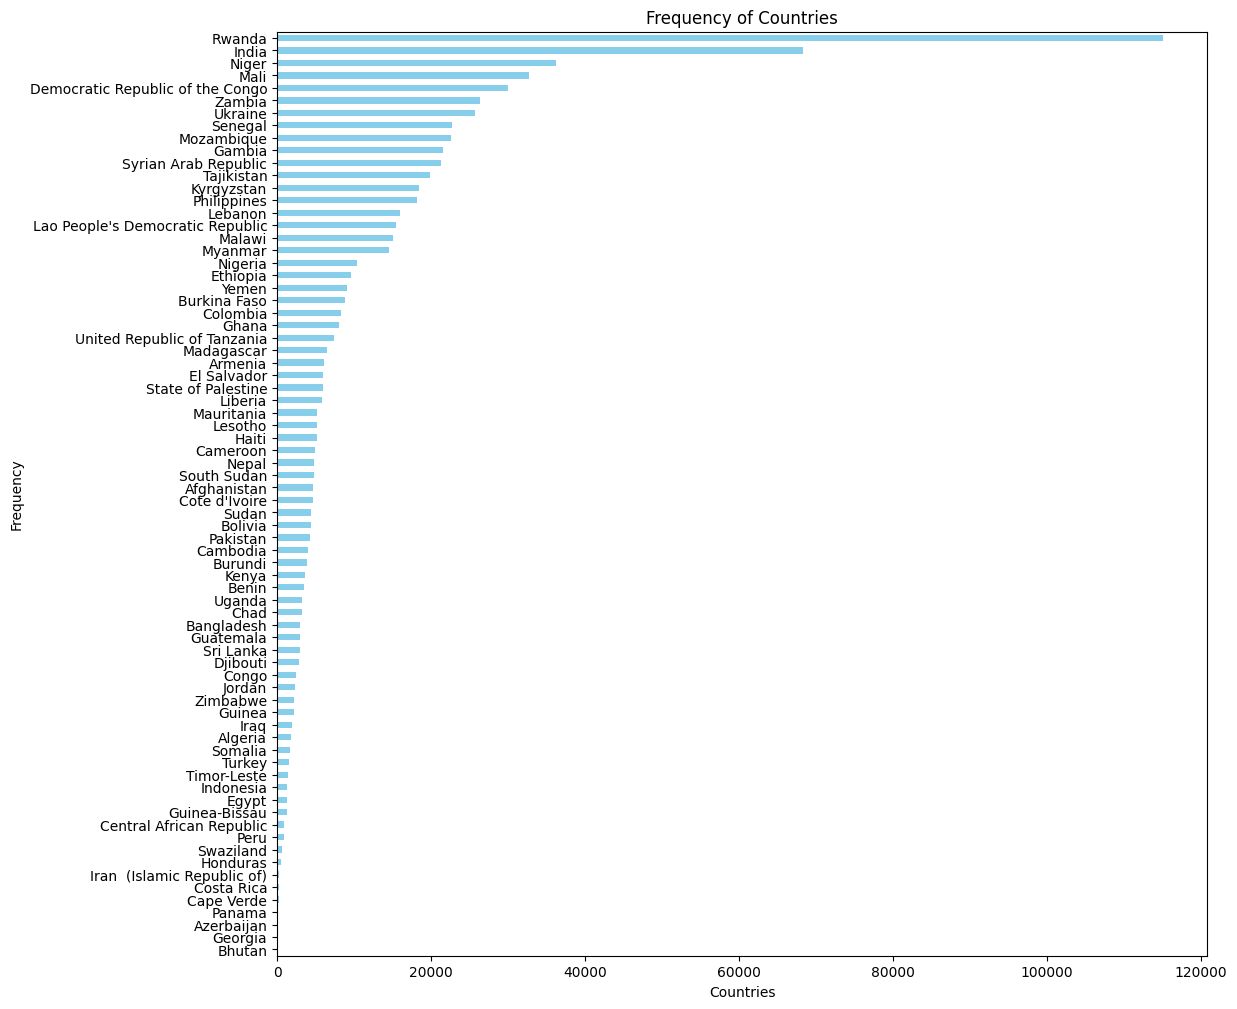

In [ ]:
#Country frequency
pd.set_option('display.max_rows', None)
unique_countries_count = data['adm0_name'].value_counts()
unique_countries_count_sorted = unique_countries_count.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 12))  # Adjust the figure size if needed
unique_countries_count_sorted.plot(kind='barh', color='skyblue')
plt.title('Frequency of Countries')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Unique City Count for each country
dups_color_and_shape = data.pivot_table(index=['adm0_name','mkt_name'], aggfunc='size')
dups = data.drop_duplicates(['adm0_name', 'mkt_name'], keep='last')
city_count = dups.groupby('adm0_name').count()
#city_count
a = city_count.sort_values('adm0_id',ascending=False)
a.reset_index()
a['adm0_id'].head(10)

adm0_name
Mali                    103
Zambia                   75
Niger                    73
Malawi                   72
Myanmar                  66
Rwanda                   63
Ethiopia                 62
India                    61
Senegal                  58
Syrian Arab Republic     38
Name: adm0_id, dtype: int64

In [ ]:
#Unique Food Items
pd.set_option('display.max_rows', None)
unique_items_count = data['cm_name'].value_counts().head(10)
print(unique_items_count)

Maize              36582
Millet             33889
Sorghum            31037
Rice (imported)    26606
Rice               24210
Maize (white)      20875
Rice (local)       20620
Sugar              19059
Wheat              17944
Wheat flour        17077
Name: cm_name, dtype: int64


In [ ]:
data.cm_name.unique()

array(['Bread', 'Wheat', 'Rice (low quality)', 'Wage (qualified labour)',
       'Livestock (sheep, one-year-old alive female)', 'Fuel (diesel)',
       'Exchange rate', 'Wage (non-qualified labour, non-agricultural)',
       'Rice', 'Beans (white)', 'Milk', 'Potatoes', 'Eggs',
       'Meat (chicken)', 'Sugar', 'Lentils', 'Pasta', 'Tomatoes', 'Oil',
       'Cheese (dry)', 'Carrots', 'Onions', 'Bananas', 'Tea',
       'Fuel (petrol-gasoline)', 'Fish (canned)', 'Apples',
       'Milk (camel)', 'Meat (camel)', 'Tea (sahm)', 'Wheat flour',
       'Oil (vegetable)', 'Rice (white)', 'Meat (pork)', 'Meat (beef)',
       'Cabbage', 'Apples (red)', 'Cucumbers (greenhouse)',
       'Fuel (kerosene)', 'Fish (fresh)', 'Bread (high grade flour)',
       'Bread (first grade flour)', 'Milk (non-pasteurized)',
       'Rice (coarse)', 'Lentils (masur)', 'Oil (palm)',
       'Rice (imported)', 'Sorghum', 'Maize (white)',
       'Cassava meal (gari)', 'Maize', 'Millet', 'Rice (local)',
       'Rice (impo

In [ ]:
#remove wage, Transport, Plantains, Exchange as they are not commodities
# Remove rows with specified keywords in 'cm_name' column
exclude_keywords = ['Wage', 'Transport', 'Plantains', 'Exchange']
data = data[data['cm_name'].apply(lambda x: all(keyword not in str(x) for keyword in exclude_keywords))]

In [ ]:
#Append population data
population = pd.read_csv('population.csv')

In [ ]:
population.head()

,Country Name,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,74710.0,77050.0,79417.0,81858.0,84355.0,86867.0,89101.0,90691.0,91781.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0
1,Africa Eastern and Southern,344418362.0,353466601.0,362985802.0,372352230.0,381715600.0,391486231.0,401600588.0,412001885.0,422741118.0,...,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0
2,Afghanistan,15455555.0,16418912.0,17106595.0,17788819.0,18493132.0,19262847.0,19542982.0,19688632.0,21000256.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0
3,Africa Western and Central,229675775.0,235861484.0,242200260.0,248713095.0,255482918.0,262397030.0,269611898.0,277160097.0,284952322.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0
4,Angola,13462031.0,13912253.0,14383350.0,14871146.0,15366864.0,15870753.0,16394062.0,16941587.0,17516139.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0


In [ ]:
#Melt the data
melted_df = pd.melt(population, id_vars=['Country Name'], var_name='Year', value_name='Population')

In [ ]:
melted_df.head()

,Country Name,Year,Population
0,Aruba,1994,74710.0
1,Africa Eastern and Southern,1994,344418362.0
2,Afghanistan,1994,15455555.0
3,Africa Western and Central,1994,229675775.0
4,Angola,1994,13462031.0


In [ ]:
#Instead of using the numbers, let's consider the population growth %
melted_df = melted_df.sort_values(by=['Country Name', 'Year'])

# Calculate the percentage growth
melted_df['Population_Growth'] = melted_df.groupby('Country Name')['Population'].pct_change() * 100

#Replacing the NA of the first row for each country with the average value of the 2nd, 3rd and 4th years.
melted_df['Population_Growth'] = melted_df.groupby('Country Name')['Population_Growth'].transform(
    lambda x: x.fillna(x.iloc[:3].mean())
)

# Reset the index
melted_df = melted_df.reset_index(drop=True)

In [ ]:
melted_df.head()

,Country Name,Year,Population,Population_Growth
0,Afghanistan,1994,15455555.0,5.210719
1,Afghanistan,1995,16418912.0,6.233079
2,Afghanistan,1996,17106595.0,4.188359
3,Afghanistan,1997,17788819.0,3.988076
4,Afghanistan,1998,18493132.0,3.959302




*   **Appended population growth data**



In [ ]:
data['mp_year'] = data['mp_year'].astype(str)
data1 = pd.merge(data, melted_df, left_on = ['adm0_name', 'mp_year'], right_on=['Country Name', 'Year'])

In [ ]:
#Append Curreny data
currency = pd.read_csv('currency.csv')
currency.head()

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,1992,39.28
1,Albania,ALB,1992,75.03
2,Algeria,DZA,1992,21.84
3,American Samoa,ASM,1992,1.00
4,Andorra,AND,1992,1.12


In [ ]:
currency['Year'] = currency['Year'].astype(str)
data1 = pd.merge(data1, currency, left_on = ['adm0_name', 'mp_year'], right_on=['Country Name', 'Year'])
data1['mp_price'] = pd.to_numeric(data1['mp_price'], errors='coerce')
data1['Value'] = pd.to_numeric(data1['Value'], errors='coerce')
data1['USD'] = data1['mp_price']/data1['Value']

In [ ]:
#Check
sorted_data1 = data1[data1['cm_name'] == 'Livestock (sheep, one-year-old alive female)'].sort_values(by='USD', ascending=False)


<Axes: ylabel='Frequency'>

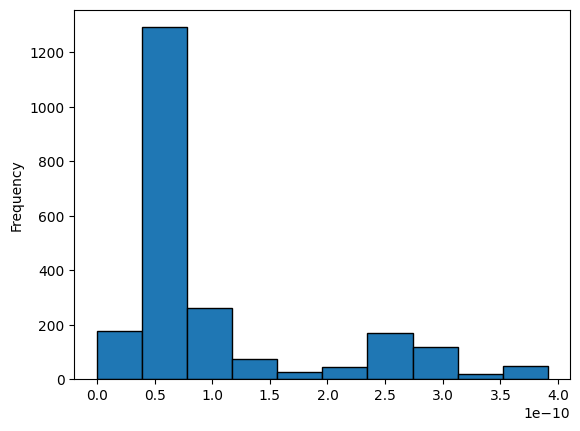

In [ ]:
data1[data1['USD'] < 0.00001]['USD'].plot.hist(bins=10, edgecolor='black')

<Axes: ylabel='Frequency'>

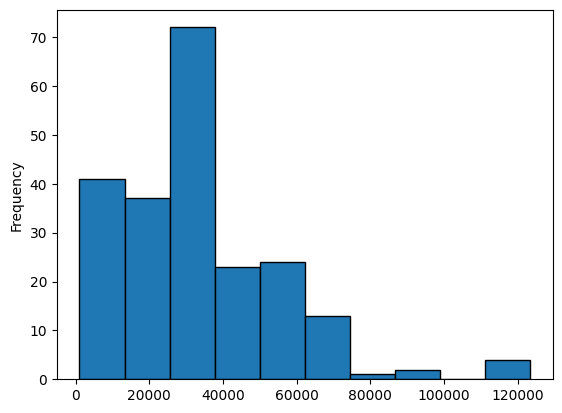

In [ ]:
data1[data1['USD'] > 1000]['USD'].plot.hist(bins=10, edgecolor='black')

In [ ]:
#Filtering out these extreme values for now
data1 = data1[data1['USD'] < 1000]
data1 = data1[data1['USD'] > 0.00001]


**Appended currency data and normalized the local currencies to equivalent USD based on the average exchange rates for that year**

In [ ]:
#Avg highest cost items
items =pd.DataFrame(data1.groupby("cm_name")["USD"].agg("mean").sort_values(ascending=False))[:321]
items.head(10)

,USD
cm_name,
Livestock (cattle),255.030427
"Livestock (sheep, two-year-old male)",176.580125
Yam,85.178431
Chickpeas (local),78.548290
Rice (high quality),71.021993
Livestock (pig),68.481505
"Livestock (sheep, medium-sized castrated male)",47.573773
Livestock (Goat),33.122338
"Livestock (goat, medium-sized castrated male)",31.435346


In [ ]:
#Avg lowest cost items
items =pd.DataFrame(data1.groupby("cm_name")["USD"].agg("mean").sort_values(ascending=True))[:321]
items.head(10)

,USD
cm_name,
Maize flour (white),0.037815
"Eggs (white, AA)",0.096855
Bread (khoboz),0.114614
Bread (bakery),0.132032
Parsley,0.139504
Eggs (imported),0.179091
Bread (shop),0.241715
Salt (iodised),0.243057
Sweet potatoes,0.261635


In [ ]:
data1['mp_year'] = pd.to_numeric(data1['mp_year'], errors='coerce').astype(str).str.split('.').str[0]

data1['mp_month'] = pd.to_numeric(data1['mp_month'], errors='coerce').astype(str).str.split('.').str[0]

# Now, convert the 'year' column to integers
data1['mp_year'] = pd.to_numeric(data1['mp_year'], errors='coerce', downcast='integer')

# Convert the 'month' column to integers
data1['mp_month'] = pd.to_numeric(data1['mp_month'], errors='coerce', downcast='integer')

# Create a new 'date' column by combining 'year' and 'month'
data1['mp_date'] = pd.to_datetime(data1['mp_year'].astype(str) + '-' + data1['mp_month'].astype(str) + '-01', errors='coerce')

# **EDA**

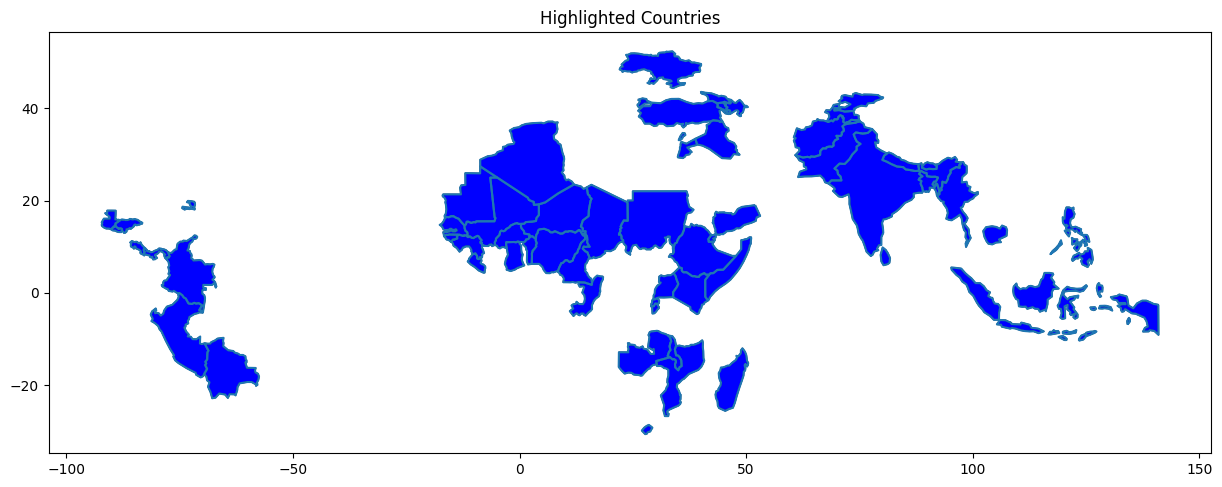

In [ ]:
#identifying the countries present in the dataset

countries=data1.adm0_name.unique().tolist()
country_df = {'Country': countries}
country_df = pd.DataFrame(country_df)
# Load the world map data using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map data with the dataframe on country names
world = world.merge(country_df, how='right', left_on='name', right_on='Country')

# Plot the world map with highlighted countries
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(ax=ax, color='blue', edgecolor='black')  # Highlight countries in lue
plt.title('Highlighted Countries')
plt.show()



**All the countries participating in this dataset have been highlighted**

**we can see that the dataset contains developing countries of the world**

**It contains the Indian Subcontinent, South-East Asia, Central and southern Africa, and some parts of Latin America**






#**Validating the commodity prices in the Indian Sub-continent**
This includes countries such as India, Pakistan, Bangladesh, Sri Lanka, Afghanistan, Nepal, and Bhutan

#**Economic Impact**

*   We validate the impact of global economic prices on the Food Commodities



In [ ]:
#Limiting our data to Global South
global_south=["India", "Pakistan", "Bangladesh", "Sri Lanka", "Afghanistan", "Nepal", "Bhutan"]
global_south_df = data1[data1["adm0_name"].isin(global_south)]

In [ ]:
#Identifying major commodity sources in this part of the world
global_south_df.groupby(["cm_name"])["adm0_name"].nunique().reset_index().sort_values(["adm0_name"],ascending=False)[:5]

,cm_name,adm0_name
37,Wheat flour,5
36,Wheat,4
8,Lentils (masur),3
32,Sugar,3
3,Fuel (diesel),3


**Wheat flour is common to 5 different countries in this part of the world, whereas Wheat is common to 4 countries**

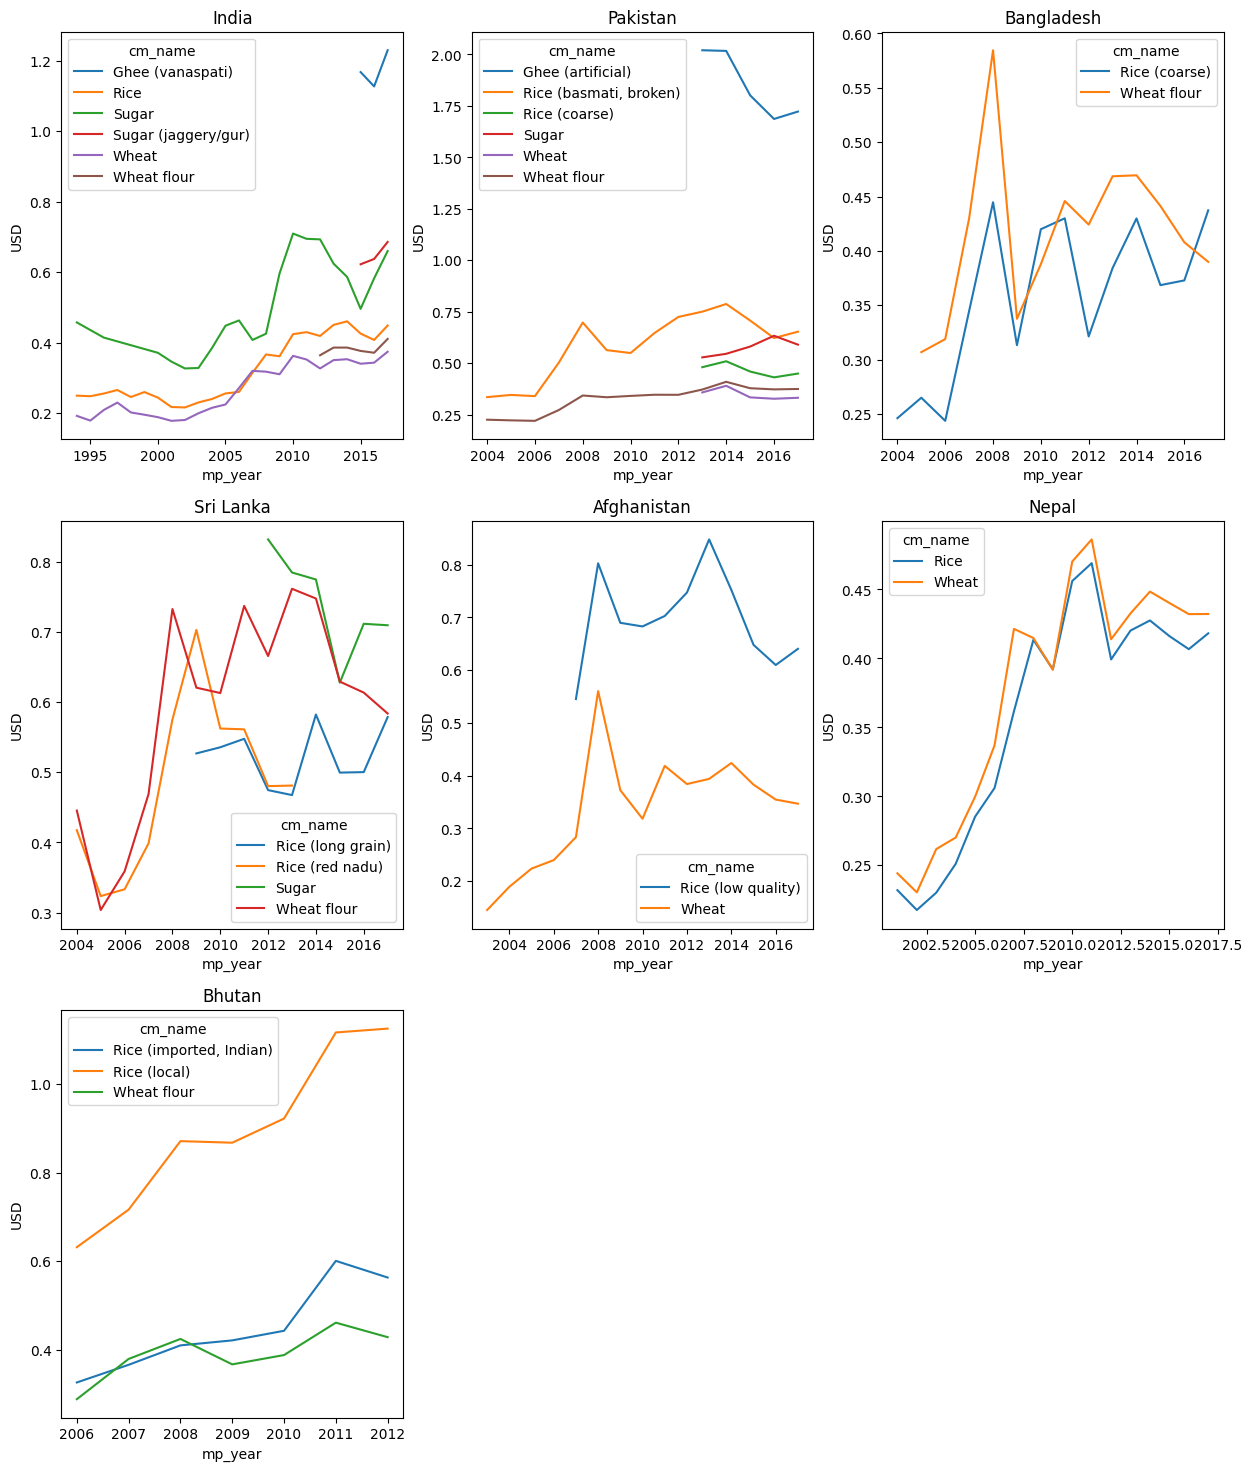

In [ ]:
## Reviewing prices of major commodities in these countries
south_commodities=[]
for commodity in ["Wheat","Rice","Sugar","Ghee"]:
    south_commodities.extend(global_south_df[global_south_df["cm_name"].str.contains(commodity)]["cm_name"].unique().tolist())

global_south_cm_df = data1[data1["cm_name"].isin(south_commodities)].groupby(["adm0_name","cm_name","mp_year"])["USD"].mean().reset_index()
fig=plt.figure(figsize=(15,18))
i=0
wf_countries = ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Afghanistan", "Nepal", "Bhutan"]
for country in wf_countries:
    ax=fig.add_subplot(3,3,i+1)
    sns.lineplot(data=global_south_cm_df[global_south_cm_df["adm0_name"]==country],x="mp_year",y="USD",hue="cm_name", ax=ax).set(title=country);
    i+=1



* The world went through a economic crisis in 2007-08 cycle. Every available data point reflects the pain of the economic hardship as every commodity prices spiked during the cycle.


---





* Economic stability serves as a crucial indicator in maintaining control over commodity prices.



---


* Countries with a stable economical growth rate such as India have a linear price hike/year in the commodities. India also has the lowest avg price of commodities in the region. However, this can also be attributed to the mass production capabilities.





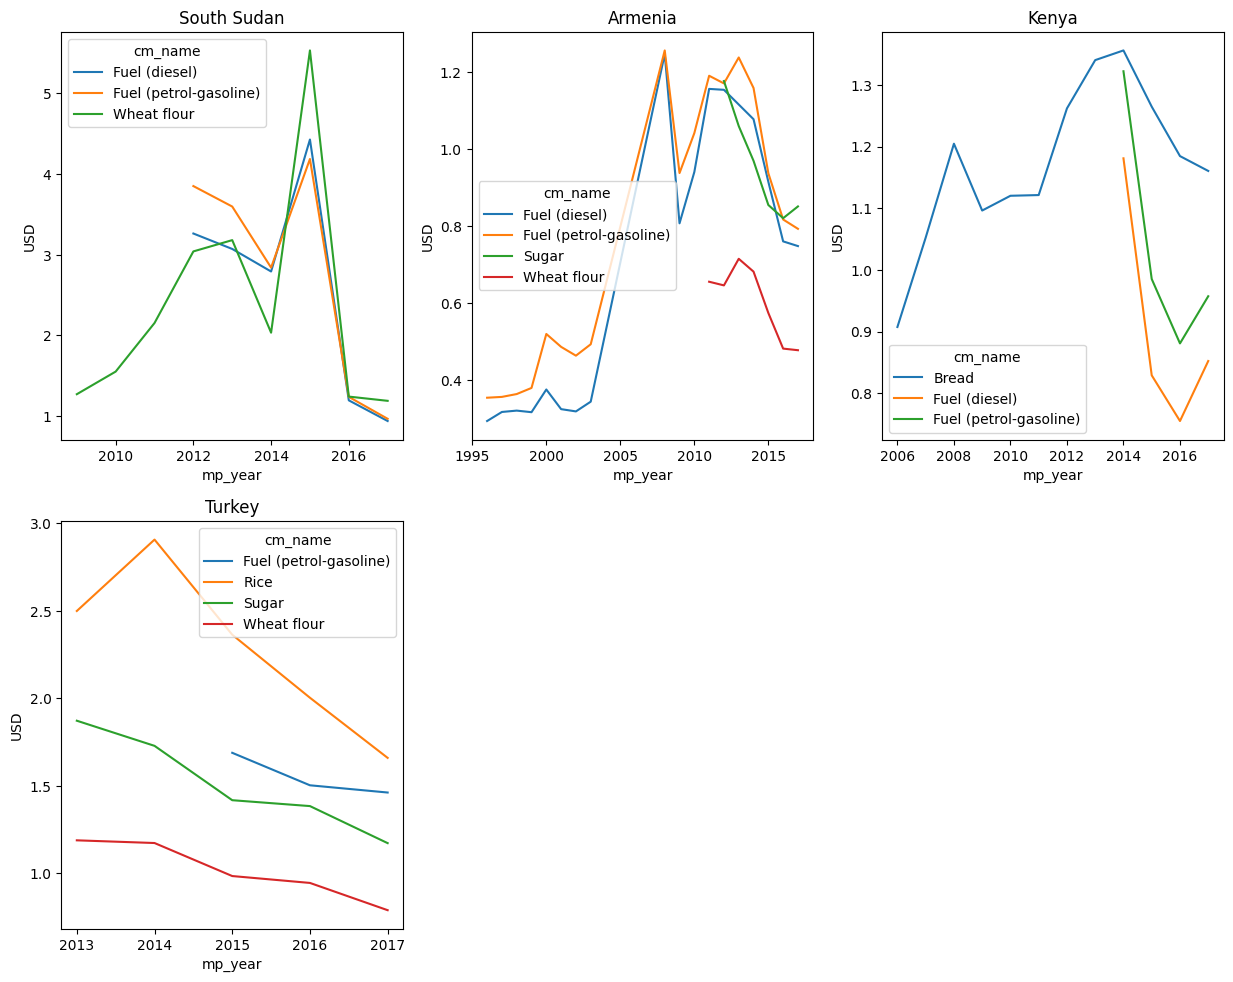

In [ ]:
#Fuel impact on commodities
south_commodities=[]
for commodity in ["Wheat","Rice","Sugar","Bread", "Maize", "Fuel"]:
    south_commodities.extend(global_south_df[global_south_df["cm_name"].str.contains(commodity)]["cm_name"].unique().tolist())

global_south_cm_df = data1[data1["cm_name"].isin(south_commodities)].groupby(["adm0_name","cm_name","mp_year"])["USD"].mean().reset_index()
fig=plt.figure(figsize=(15,18))
i=0
wf_countries = [ "South Sudan", "Armenia", "Kenya", "Turkey"]
for country in wf_countries:
    ax=fig.add_subplot(3,3,i+1)
    sns.lineplot(data=global_south_cm_df[global_south_cm_df["adm0_name"]==country],x="mp_year",y="USD",hue="cm_name", ax=ax).set(title=country);
    i+=1

**The rise in fuel prices resulted in an increase in commodity prices**

# **Production Capabilities**

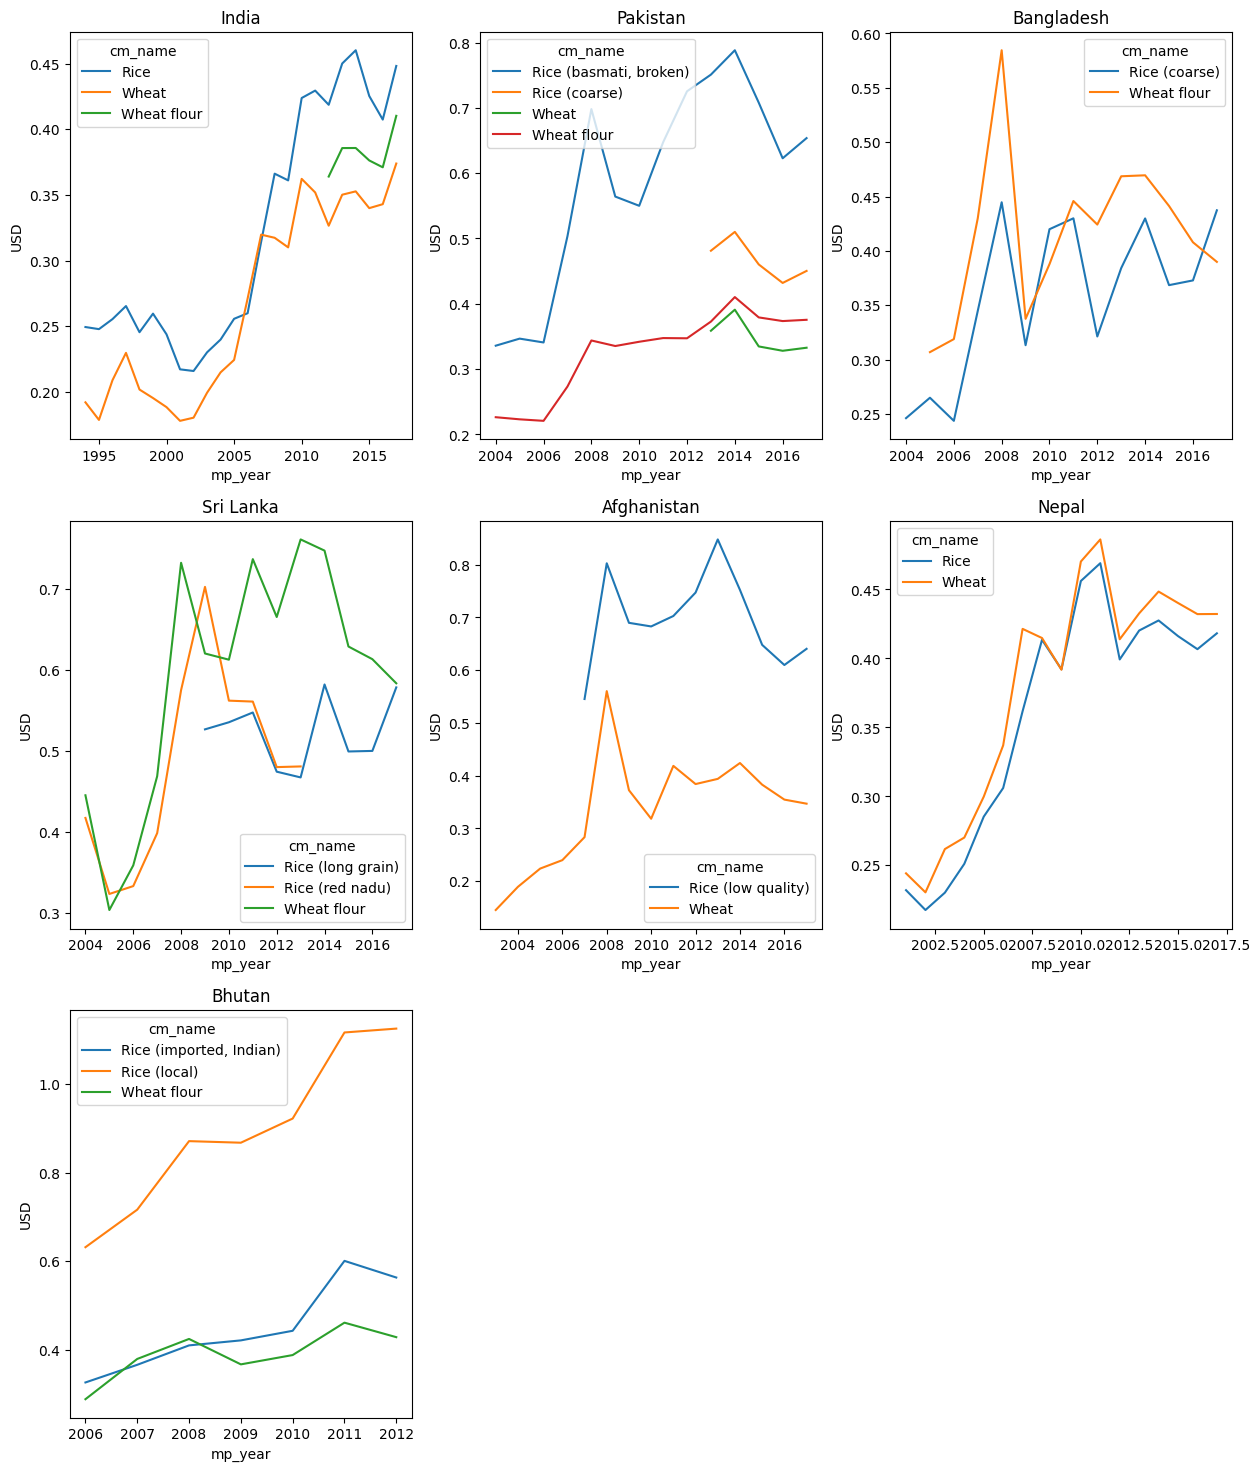

In [ ]:
## Reviewing prices of major commodities in these countries
south_commodities=[]
for commodity in ["Wheat","Rice"]:
    south_commodities.extend(global_south_df[global_south_df["cm_name"].str.contains(commodity)]["cm_name"].unique().tolist())

global_south_wr_df = data1[data1["cm_name"].isin(south_commodities)].groupby(["adm0_name","cm_name","mp_year"])["USD"].mean().reset_index()
fig=plt.figure(figsize=(15,18))
i=0
wf_countries = ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Afghanistan", "Nepal", "Bhutan"]
for country in wf_countries:
    ax=fig.add_subplot(3,3,i+1)
    sns.lineplot(data=global_south_wr_df[global_south_wr_df["adm0_name"]==country],x="mp_year",y="USD",hue="cm_name", ax=ax).set(title=country);
    i+=1



*   India and Pakistan are one the largest producers of Wheat. Hence, we can see that the avg prices of wheat in these countires have been the lowest in the region.


---


*   Similary- India, Bangladesh and Nepal are one of the largest producers of Rice and hence the avg. prices of Rice have been lower in these countries.


---


*   Therefore, we can reasonably infer a direct correlation between prices and the favorable conditions conducive to the growth of commodities.


---


*   Although Afghanistan and Sri Lanka also produce wheat and rice respectively - the avg prices of these commodties are higher in the region. This can be attributed to the economic/political instability




# **Cultural Habits and Favourable Conditions**



*   **We have seen that the commodities have a lower prices in the countries where they are produced. However, an additional factor influencing their pricing is the cultural impact of dietary habits.**


---


*   **Let us consider India which is a major producer of both Wheat and Rice. However, Rice is a more preffered meal in the eastern and southern parts of India, whereas wheat dominates the North. Western India almost has an equal preference for both Rice and Wheat.**


---


*   **Let us validate if these cultural dietary habits impacts the prices of these commodities.**






In [ ]:
# let us consider 4 states - Andhra Pradesh from south, Maharashtra from West,Rajasthan from North and Meghalaya from East

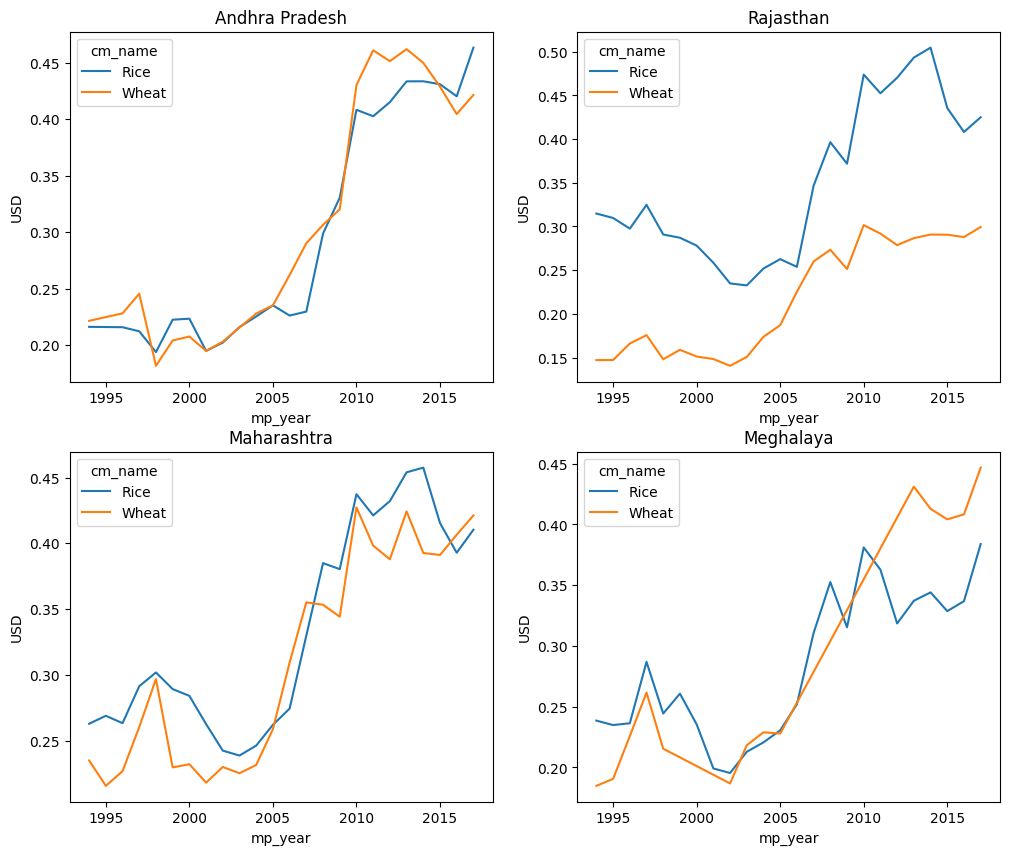

In [ ]:
ind_states_list=["Andhra Pradesh","Rajasthan","Maharashtra","Meghalaya"]
indian_states_df = data1[data1["adm1_name"].isin(ind_states_list)]
india_df = indian_states_df[indian_states_df["cm_name"].isin(["Rice","Wheat"])].groupby(["adm1_name","cm_name","mp_year"])["USD"].mean().reset_index()
fig=plt.figure(figsize=(12,10))
i=0
for state in ind_states_list:
    ax=fig.add_subplot(2,2,i+1)
    sns.lineplot(data=india_df[india_df["adm1_name"]==state],x="mp_year",y="USD",hue="cm_name", ax=ax).set(title=state);
    i+=1



*   **Hence, it becomes evident that in regions where rice is preferred over wheat, the prices of rice tend to be lower.**


---


*   **Similarly, in regions where Wheat is preffered, the price of wheat is lower.**


---


*   **This can be possible due to multiple factors such as high production, government regulations**






# **Seasonal Impact**

In [ ]:
# grouping months by Seasons
global_south_df["Season"] = global_south_df['mp_month'].apply(lambda x: "Summer" if x>=4 and x<=7 else "Rainy" if x>=8 and x<=10 else "winter")

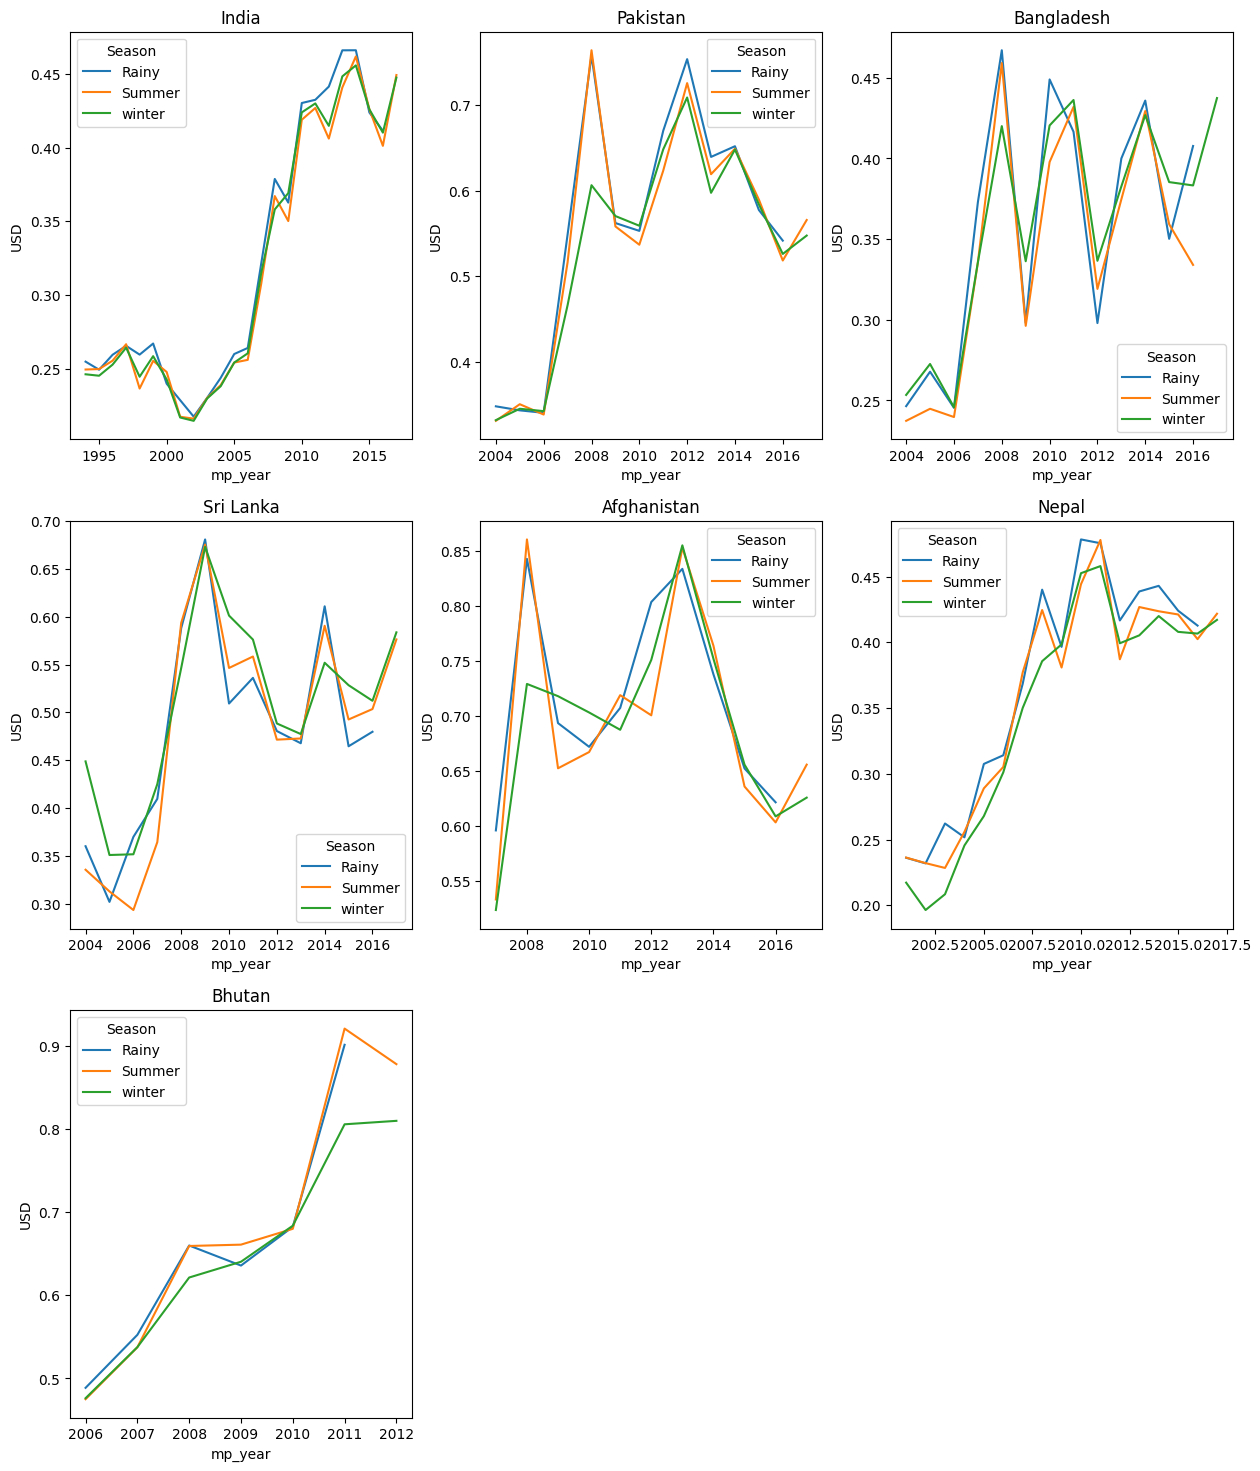

In [ ]:
# Analysing prices of Rice based on Seasons
global_south_season_df = global_south_df[global_south_df["cm_name"].str.contains("Rice")].groupby(["adm0_name","Season","mp_year"])["USD"].mean().reset_index()
fig=plt.figure(figsize=(15,18))
i=0
for country in wf_countries:
    ax=fig.add_subplot(3,3,i+1)
    sns.lineplot(data=global_south_season_df[global_south_season_df["adm0_name"]==country],x="mp_year",y="USD",hue="Season", ax=ax).set(title=country);
    i+=1



*   **Historically, Rice prices have been the lowest in the winter season. In the Indian Sub-continent, Rice is harvested more in the November - January than other months**
*   **The prices peak in Rainy season. This is the time when Rice is sowed in majority of the regions**



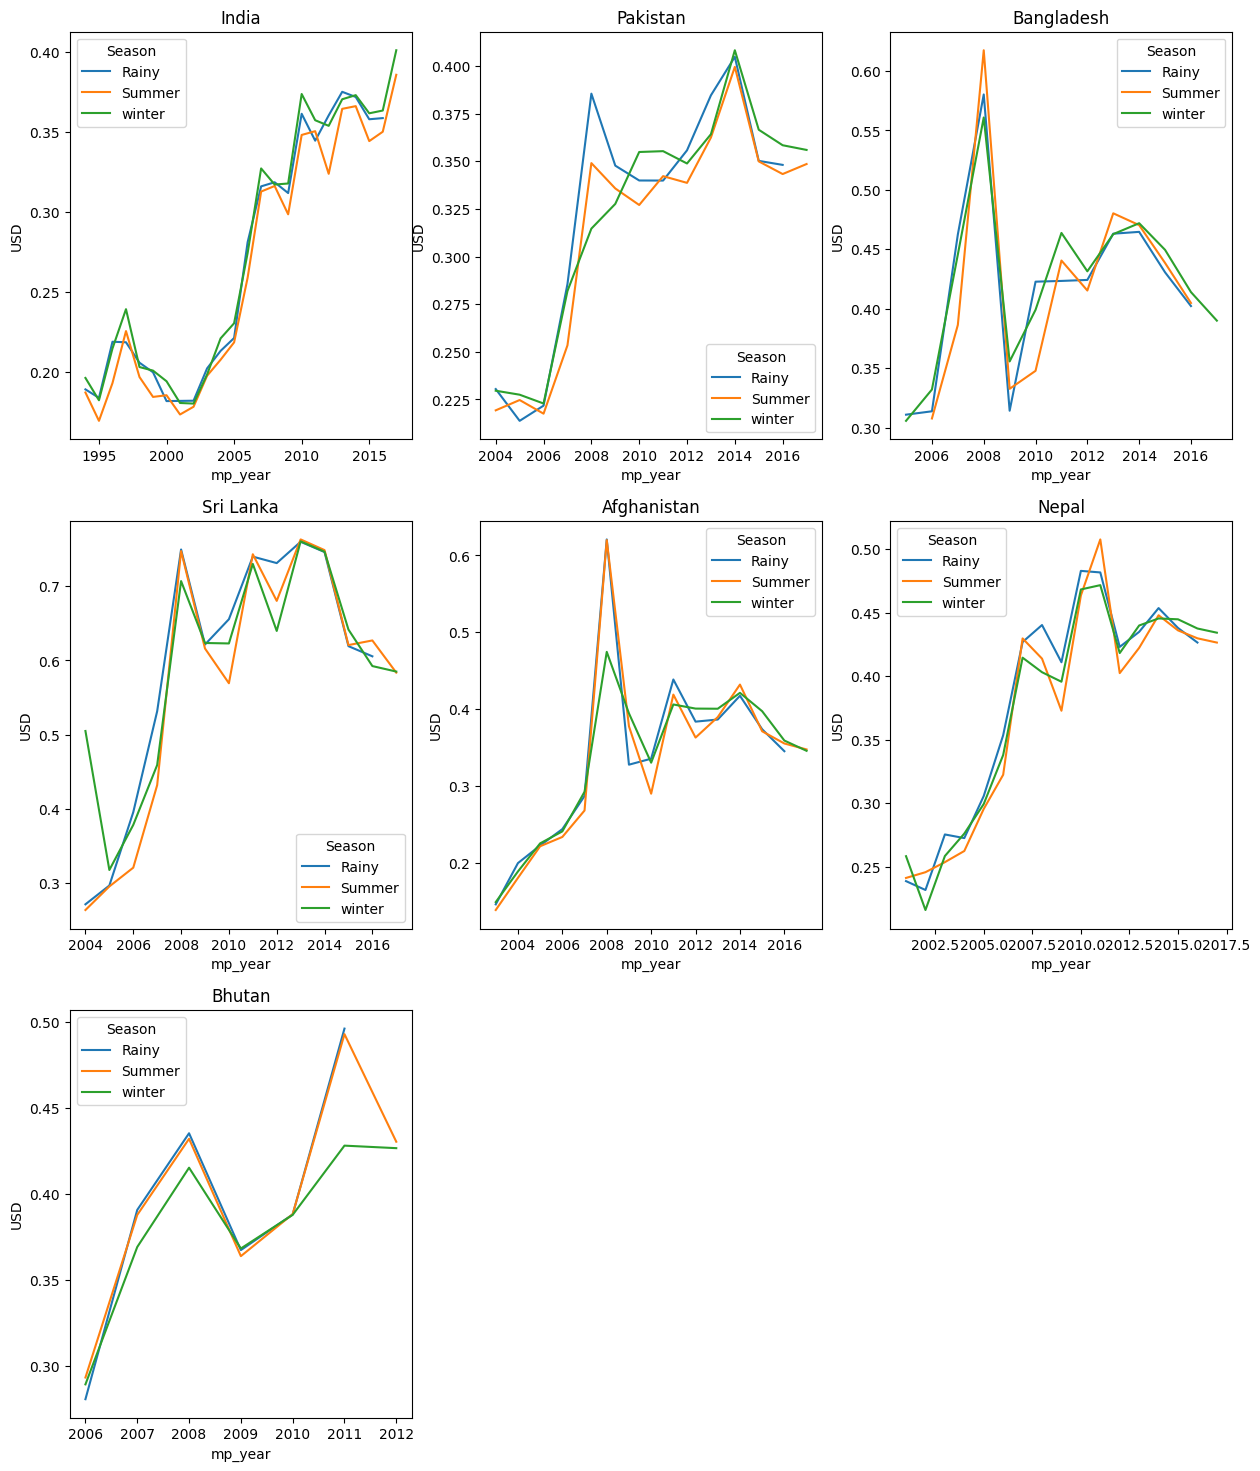

In [ ]:
# Analysing prices of Wheat based on Seasons
global_south_season_df = global_south_df[global_south_df["cm_name"].str.contains("Wheat")].groupby(["adm0_name","Season","mp_year"])["USD"].mean().reset_index()
fig=plt.figure(figsize=(15,18))
i=0
for country in wf_countries:
    ax=fig.add_subplot(3,3,i+1)
    sns.lineplot(data=global_south_season_df[global_south_season_df["adm0_name"]==country],x="mp_year",y="USD",hue="Season", ax=ax).set(title=country);
    i+=1



*   **Historically, Wheat prices have been the lowest in the Summer season. In the Indian Sub-continent, Wheat is harvested more in the February - May than other months**

*   **The prices peak in Rainy season.**

*   **The increase in prices during the rainy season can be attributed to factors such as crop damage, delays in transportation, and other weather related issues**






# **Commodities affecting prices of their By-products¶**

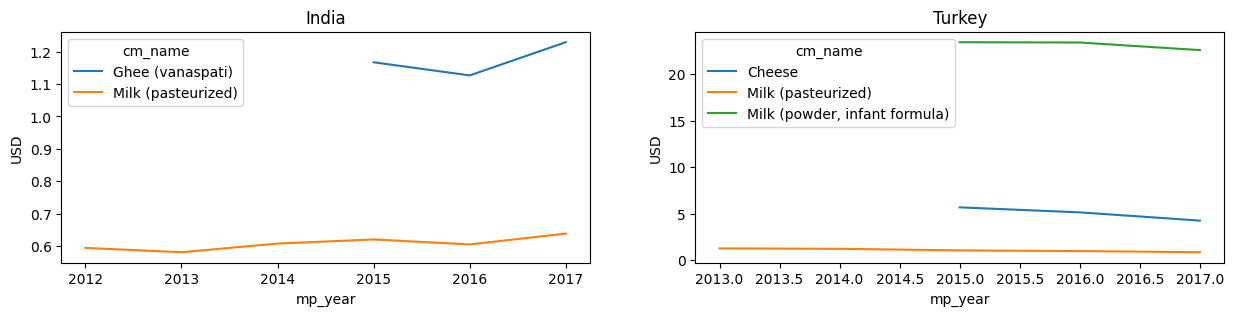

In [ ]:
milk_commodities=[]
for commodity in ["Milk","Ghee","Cheese"]:
    milk_commodities.extend(data1[data1["cm_name"].str.contains(commodity)]["cm_name"].unique().tolist())

milk_countries = ["India","Turkey"]
milk_df = data1[data1["cm_name"].isin(milk_commodities)].groupby(["adm0_name","cm_name","mp_year"])["USD"].mean().reset_index()


fig=plt.figure(figsize=(15,3))
i=0
for country in milk_countries:
    ax=fig.add_subplot(1,2,i+1)
    sns.lineplot(data=milk_df[milk_df["adm0_name"]==country],x="mp_year",y="USD",hue="cm_name", ax=ax).set(title=country);
    i+=1



*   **Since Ghee, Cheese and Milk Powder are all by-products of Milk, hence there is a good possibility that their prices are dependent on Milk.**


---


*   **In India, the price of Ghee follows the price of Milk. Similarly, in Turkey the prices of Cheese and Milk powder have followed the prices of Milk.**


---


*   **In India, the prices have been increasing since 2016 whereas in Turkey the prices are being reduced. However, the avg price of Milk in India is still lesser than that in Turkey.**




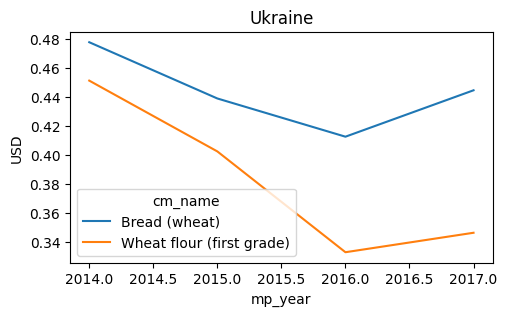

In [ ]:
bread_countries = ["Ukraine"]
bread_commodity = ["Bread (wheat)","Wheat flour (first grade)"]
bread_df = data1[data1["cm_name"].isin(bread_commodity)].groupby(["adm0_name","cm_name","mp_year"])["USD"].mean().reset_index()

fig=plt.figure(figsize=(12,3))
i=0
for country in bread_countries:
    ax=fig.add_subplot(1,2,i+1)
    sns.lineplot(data=bread_df[bread_df["adm0_name"]==country],x="mp_year",y="USD",hue="cm_name", ax=ax).set(title=country);
    i+=1



*   **We solidify our hypothesis by observing that the prices of Bread(made from Wheat) also follow the price of Wheat in Ukraine.**


---


*   **Thus, the prices of commodities are also affected by their by-products**



In [ ]:
data1['month'] = data1['mp_date'].dt.month
data1['quarter'] = data1['mp_date'].dt.quarter
data1['year'] = data1['mp_date'].dt.year

In [ ]:
#Lag Variables
data1 = data1.sort_values(by=['adm0_id', 'adm1_id', 'mkt_id', 'cm_id', 'pt_id', 'um_id', 'mp_date'])

# Add a 6-month lag variable for the 'Price' column within each group
data1['Price_lag_6'] = data1.groupby(['adm0_id', 'adm1_id', 'mkt_id', 'cm_id', 'pt_id', 'um_id'])['USD'].transform(lambda x: x.shift(6))

# Fill missing values with the next immediate value within each group
data1['Price_lag_6'] = data1.groupby(['adm0_id', 'adm1_id', 'mkt_id', 'cm_id', 'pt_id', 'um_id'])['Price_lag_6'].transform(lambda x: x.fillna(method='bfill'))

# Reset the index after sorting
data1 = data1.reset_index(drop=True)

In [ ]:
#Using the 2017 data for testing
split_date = pd.to_datetime('2017-01-01')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns to be label encoded
columns_to_encode = ['adm0_name', 'adm1_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name']

# Apply Label Encoding to each selected column
label_encoder = LabelEncoder()
for col in columns_to_encode:
    data1[col + '_encoded'] = label_encoder.fit_transform(data1[col])

In [ ]:
train = data1[data1['mp_date'] < split_date]

In [ ]:
train.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,...,month,quarter,year,Price_lag_6,adm0_name_encoded,adm1_name_encoded,mkt_name_encoded,cm_name_encoded,cur_name_encoded,pt_name_encoded
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,1,1,2014,0.873362,0,66,392,30,0,2
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,2,1,2014,0.873362,0,66,392,30,0,2
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,3,1,2014,0.873362,0,66,392,30,0,2
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,4,2,2014,0.873362,0,66,392,30,0,2
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,...,5,2,2014,0.873362,0,66,392,30,0,2


In [ ]:
test = data1[data1['mp_date'] >= split_date]

In [ ]:
y_train = train[['USD']]
y_test = test[['USD']]
X_train = train[['adm0_name_encoded', 'adm1_name_encoded', 'mkt_name_encoded', 'cm_name_encoded', 'pt_name_encoded', 'um_id', 'month', 'quarter', 'year', 'Price_lag_6']]
X_test = test[['adm0_name_encoded', 'adm1_name_encoded', 'mkt_name_encoded', 'cm_name_encoded', 'pt_name_encoded', 'um_id', 'month', 'quarter', 'year', 'Price_lag_6']]

In [ ]:
# Define the XGBoost regressor
reg = xgb.XGBRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    #'alpha': [0, 0.1],
    #'lambda': [0, 0.1]

}

# Create the GridSearchCV object
grid_search = GridSearchCV(reg, param_grid, cv=2, scoring='neg_mean_absolute_error', verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_reg = grid_search.best_estimator_
y_pred_train = best_reg.predict(X_train)
y_pred_test = best_reg.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Training MAE:", mae_train)
print("Test MAE:", mae_test)



Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
Training MAE: 0.6401835467715908
Test MAE: 0.766889328789092


In [ ]:
from sklearn.metrics import r2_score
r2_value = r2_score(y_test, y_pred_test)
r2_value

0.7388253579812152

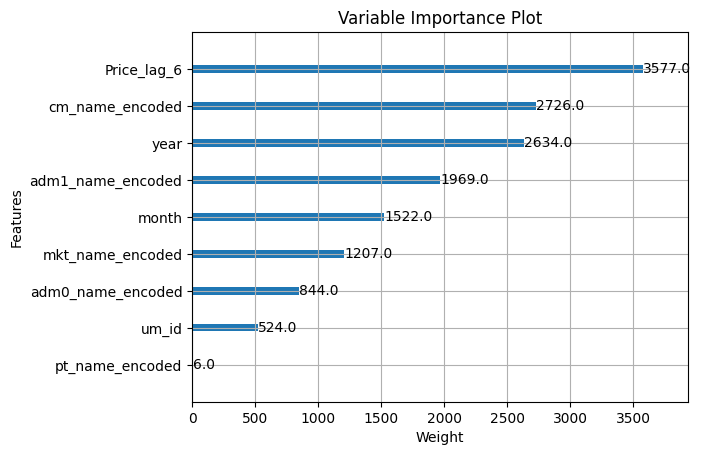

In [ ]:
xgb.plot_importance(best_reg, importance_type='weight', title='Variable Importance Plot', xlabel='Weight')
plt.show()

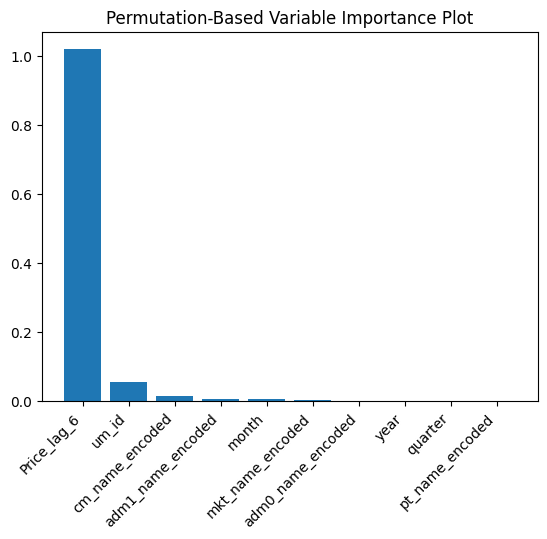

In [ ]:
from sklearn.inspection import permutation_importance

# Assuming you have trained your XGBoost model (best_reg) and you have X_test and y_test
result = permutation_importance(best_reg, X_test, y_test, n_repeats=30, random_state=42)

# Extract and sort feature importances
sorted_idx = result.importances_mean.argsort()[::-1]

# Plot the permutation-based feature importances
plt.bar(range(X_test.shape[1]), result.importances_mean[sorted_idx])
plt.xticks(range(X_test.shape[1]), X_test.columns[sorted_idx], rotation=45, ha='right')
plt.title('Permutation-Based Variable Importance Plot')
plt.show()


* **The number of times a feature is used to split the data across all trees. Higher the weight, most used the feature**

---



* **The importancce of a feature is determined by the drop in the model performance when the feature values are permuted**

---


* **Commodity, year, State and month seems to be important features**




# **Recommendations for Risk mitigation Strategies**



1.   **Economic stability of the country serves as a crucial indicator in maintaining control over commodity prices.**

---


2.   **The rise in fuel prices resulted in an increase in commodity prices**


---


3.   **There is a direct correlation between prices and the favorable conditions conducive to the growth of commodities.**


---


4.   **Cultural dietary habits impacts the prices of these commodities**


---


5.   **Seasonal Impact**


---


6.   **The prices of commodities are also affected by their by-products**





